# Correlation between MAF and sample size

In [1]:
import polars as pl
from scipy.stats import pearsonr
from statsmodels import api as sm
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
dataset = pl.read_parquet("../../data/rescaled-betas.parquet")


In [4]:
data = (
    dataset.select("nSamples", "majorPopulationMAF")
    .filter(pl.col("nSamples").is_finite())
    .filter(pl.col("majorPopulationMAF").is_not_nan())
    .to_pandas()
)


In [6]:
pearsonr(data["nSamples"], data["majorPopulationMAF"])


PearsonRResult(statistic=0.008806097458919655, pvalue=4.320973695804962e-46)

Very weak correlation between sample size and MAF. The correlation is positive, but very weak.

In [9]:
x = data["majorPopulationMAF"]
# y = np.log(data["credibleSetSize"]) + 1
y = data["nSamples"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               nSamples   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     203.1
Date:                Thu, 01 May 2025   Prob (F-statistic):           4.32e-46
Time:                        01:51:52   Log-Likelihood:            -3.6639e+07
No. Observations:             2619406   AIC:                         7.328e+07
Df Residuals:                 2619404   BIC:                         7.328e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.232e+04    337

The correlation R^2 is 0.00, which means that the variance in the cs size can be explained by sample size. This is a very low value, indicating that the two variables are not strongly related.

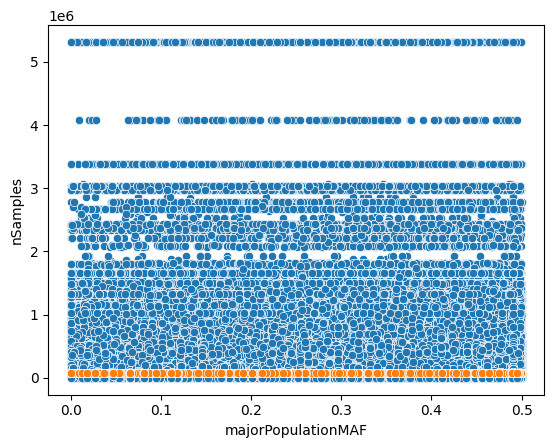

In [10]:
sns.scatterplot(data=data, x="majorPopulationMAF", y="nSamples")
y_pred = model.predict(x)
sns.scatterplot(data=data, x="majorPopulationMAF", y=y_pred)
plt.show()
